<a id='top'></a>
<img align="center" src="https://i.ytimg.com/vi/vBQwMhi-_w8/maxresdefault.jpg" width="200" />
<p style="text-align: center;">
    <font size='5' type='bold'>
        <b>Оптимизация сталелитейного производства</b>
    </font>
</p>

### Содержание

<a href='#section_0'>Описание проекта</a>

<a href='#section_1'>Исследовательский анализ данных</a>

<a href='#section_2'>Предобработка данных</a>

<a href='#section_3'>Подготовка данных</a>

<a href='#section_4'>Обучение моделей</a>

<a href='#section_lib'>Список использованной литературы</a>

<a href='#section_i'>План работы</a>

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Алексей, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.<br>
    
картинка визуально оживляет)

<a id='section_0'></a>
### Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали. Целевой признак: последняя измеренная температура. Необходимо достичь качество модели по метрике MAE ≤ 6.0

#### Описание этапа обработки
Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

<a href='#top'>Back to top</a>

<a id='section_1'></a>
### 1. Исследовательский анализ данных

In [1]:
# Импортируем необходимые для работы библиотеки

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
import numpy as np

from sklearn.preprocessing import StandardScaler
rnd_state = 260686
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from catboost import CatBoostRegressor

In [2]:
# Добавим необходимые функции для упрощения работы с данными

def basic_info(dataset):
    print('_/_/_/ Общая информация о данных _/_/_/')
    print()
    display(dataset.info())
    print('_/_/_/ Пропуски в данных _/_/_/')
    print()
    display(dataset.isna().sum())
    print('_/_/_/ Дубликаты _/_/_/')
    print()
    display(dataset.duplicated().sum())
    print()
    print('_/_/_/ Статистика по данным _/_/_/')
    display(dataset.describe())
    print()
    print('_/_/_/ Таблица с данными _/_/_/')
    display(dataset.head(3))

def basic_plots(dataset, feature_name, bins=20):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    sns.distplot(dataset[feature_name], ax=ax1)
    sns.boxplot(dataset[feature_name], ax=ax2)
    ax1.set(title=feature_name)
    ax2.set(title=feature_name)   


Импортируем и изучим данные Заказчика

data_arc = pd.read_csv('final_steel/data_arc.csv')
data_bulk = pd.read_csv('final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('final_steel/data_gas.csv')
data_temp = pd.read_csv('final_steel/data_temp.csv')
data_wire = pd.read_csv('final_steel/data_wire.csv')
data_wire_time = pd.read_csv('final_steel/data_wire_time.csv')

In [3]:
data_arc = pd.read_csv('final_steel/data_arc.csv')
data_bulk = pd.read_csv('final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('final_steel/data_gas.csv')
data_temp = pd.read_csv('final_steel/data_temp.csv')
data_wire = pd.read_csv('final_steel/data_wire.csv')
data_wire_time = pd.read_csv('final_steel/data_wire_time.csv')

#### Описание данных
Данные состоят из файлов, полученных из разных источников:
* data_arc.csv — данные об электродах;
* data_bulk.csv — данные о подаче сыпучих материалов (объём);
* data_bulk_time.csv — данные о подаче сыпучих материалов (время);
* data_gas.csv — данные о продувке сплава газом;
* data_temp.csv — результаты измерения температуры;
* data_wire.csv — данные о проволочных материалах (объём);
* data_wire_time.csv — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

#### Данные об электродах

In [4]:
basic_info(data_arc)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

_/_/_/ Пропуски в данных _/_/_/



key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388



_/_/_/ Таблица с данными _/_/_/


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805


* В данных представлено 14876 строк (объектов) и 5 столбцов (признаков). Как ранее отмечалось, несколько строк с одинаковым значением `key` (номер партии): они соответствуют разным итерациям обработки.
* Пропусков и дубликатов в данных не обнаружено
* Значение `-715.504924` в статистике по реактивной мощности необходимо проверить на выбросы
* Типы данных временных признаков необходимо привести к формату `datetime`

In [5]:
# Приведем тип данных времени начала и конца нагрева к datetime

data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])

data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


Для выявления важности величин активной и реактивной мощностей в процессе сталеварения обратимся к теории. В настоящее время проблема снижения энергоемкости производства стали и повышение технико-экономических показателей работы ДСП малой вместимости является одной из актуальных задач стоящих перед отечественной металлургией. Повышение эффективности работы ДСП возможно за счет оптимизации энерготехнологического режима электроплавки стали и улучшения тепловой работы агрегата.

На ДСП подводимую к печи мощность регулируют путем переключения ступеней напряжения печного трансформатора. В период расплавления шихтовых материалов работают на максимальных ступенях напряжения трансфоратора, в окислительный период – на средних и в восстановительный период – на низших, что позволяет обеспечить оптимальные значения подводимой мощности. Кроме
этого, для всех ступеней напряжения при помощи автоматических регуляторов поддерживают наиболее оптимальную мощность электрических дуг и силу тока.

Электродуговую печь с позиции электротехники можно представить набором *реактивных $X$ и активных $R$ сопротивлений*, которые подключены к печному трансформатору.

Рациональный электрический режим работы ДСП выбирают путем расчета рабочих и электрических характеристик ДСП в зависимости от *силы тока электрической дуги $I_Д$*, электрических, тепловых и технико-экономических параметров ДСП. Формулы для расчѐта рациональных электрических режимов, представленные в данных, следующие:
* Мощность полная
$$S=3U_{2ф}I_Д,$$
где $U_{2ф}$ - вторичное фазное напряжение трансформатора


* Реактивная мощность
$$Q=3I^2_ДX$$

* Активная мощность
$$P_{акт}= \sqrt {S^2-Q^2}$$

Как видим, активная мощность - это вычисляемая величина, что предполагает высокую корреляцию той величины с данными по реактивной мощности.

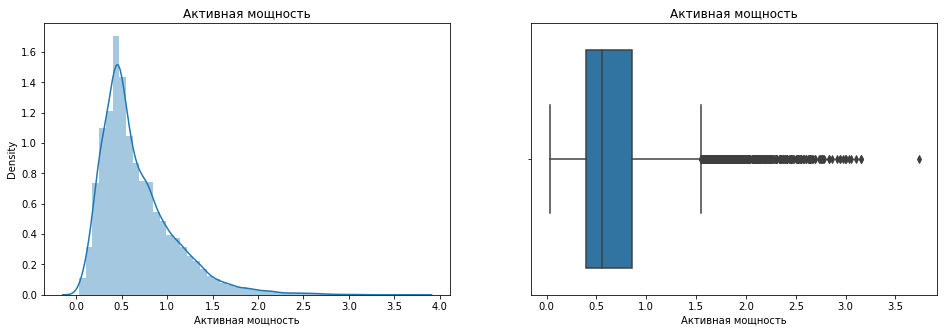

In [6]:
basic_plots(data_arc, 'Активная мощность')

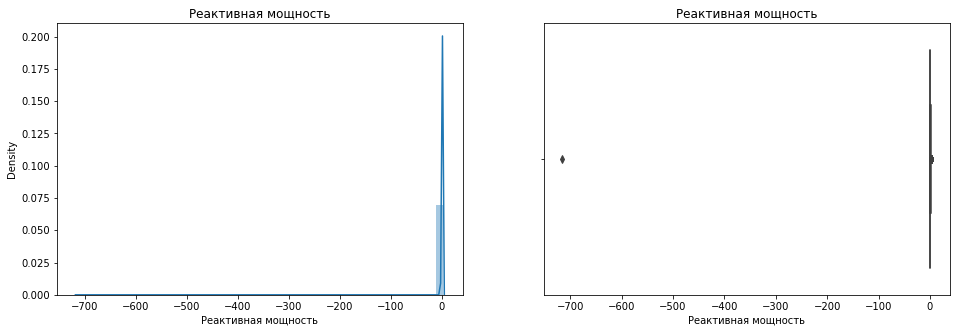

In [7]:
basic_plots(data_arc, 'Реактивная мощность')

По реактивной мощности значение `-715.504924` явный выброс, от которого необходимо избавиться. Так как нагрузка в действующей схеме имеет активно-индуктивный характер, то реактивная мощность может должна быть положительной величиной. А значит нужно избавиться от отрицательных значений.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ок

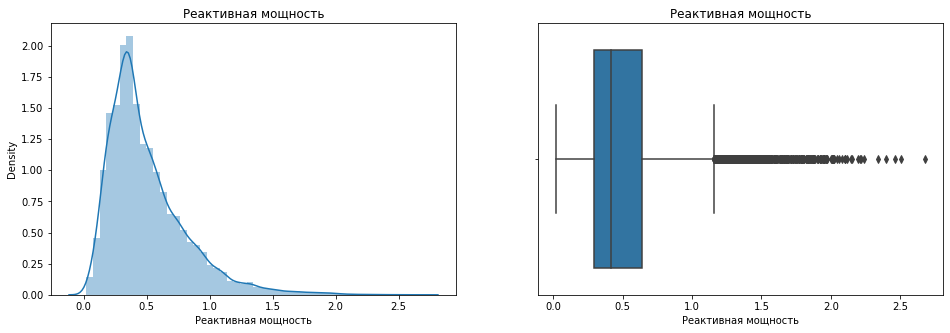

In [8]:
# Избавимся от выбросов

data_arc = data_arc[data_arc['Реактивная мощность'] >= 0]
basic_plots(data_arc, 'Реактивная мощность')

Как мы уже ранее выяснили активная и реаткивная мощности коррелируют друг с другом. Их взаимосвязь может быть выражена через величину полной мощности, которая может быть использована в качесте дополнительного признака. Рассчитаем ее и добавим в датасет.

In [9]:
data_arc['Полная мощность'] = data_arc.apply(lambda x: math.sqrt(x['Активная мощность']**2 \
                                                                 + x['Реактивная мощность']**2), axis=1)
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>хорошая идея с новым фактором - значимый может быть. Вопрос только в том - стоит ли их все тянуть в модель - не будет ли мультиколлинеарности. Например все мощности коррелируют между собой? если да - то не стоит их вместе использовать...

И посмотрим на распределение величин нового столбца.

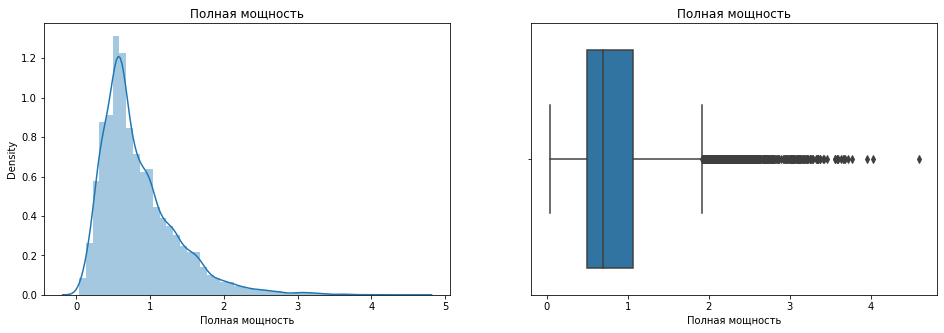

In [10]:
basic_plots(data_arc, 'Полная мощность')

Также выясним сколько уникальных значений номеров партий электродов в датасете.

In [11]:
data_arc['key'].nunique()

3214

Проанализировали данные об электродах:
* Общее количество уникальный партий электродов - 3214
* На каждую партию в среднем приходится 4-5 записей. Всего 14876 объектов.
* Пропуски и дубликаты отстутствуют
* В датасет добавили признак полной мощности
* Распределение величин всех трех видов мощностей (активной, реактивной, полной) почти нормальное с небольшим смещением влево со следующим диапазоном основных значений:
    * 0.0-1.5 МВт - активная мощность
    * 0.0-1.1 МВАр - реактивная мощность
    * 0.0-1.9 МВА - полная мощность

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>грамотный раздел получился.

<a href='#top'>Back to top</a>

#### Данные о подаче сыпучих материалов

In [12]:
basic_info(data_bulk)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

_/_/_/ Пропуски в данных _/_/_/



key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000



_/_/_/ Таблица с данными _/_/_/


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0


Проанализировали данные об объемах подачи сыпучих материалов:
* В датасете 3129 объектов и 16 признаков (партия электрода + по одному на каждый вид сыпучих материалов)
* Есть пропуски, но для такого набора данных это вполне характерно, так как добавки подаются не одновременно. Так как они не подавались, значит объем компонента был равен 0
* Дубликаты отсутствуют

<a href='#top'>Back to top</a>

#### Данные о подаче сыпучих материалов (время)

In [13]:
basic_info(data_bulk_time)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

_/_/_/ Пропуски в данных _/_/_/



key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000



_/_/_/ Таблица с данными _/_/_/


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40


Проанализировали данные о времени подачи сыпучих материалов:
* Есть пропуски, которые соответствуют подаче определенных материалов
* Число объектов соответствующее
* Дубликаты отсутствуют

Переведем тип данных времени подачи сыпучих материалов в формат `datetime`

In [14]:
cols=[i for i in data_bulk_time.columns if i not in ['key']]
for col in cols:
    data_bulk_time[col]=pd.to_datetime(data_bulk_time[col])
    
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


<a href='#top'>Back to top</a>

#### Данные о продувке сплава газом

In [15]:
basic_info(data_gas)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

_/_/_/ Пропуски в данных _/_/_/



key      0
Газ 1    0
dtype: int64

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040



_/_/_/ Таблица с данными _/_/_/


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793


Проанализировали данные о продувке сплава газом:
* В датасете 3239 объектов и только 1 признак (подача газа)
* Дубликаты и пропуски отсутствуют
* Явных выбросов не обнаружено

<a href='#top'>Back to top</a>

#### Результаты измерения температуры

In [16]:
basic_info(data_temp)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

_/_/_/ Пропуски в данных _/_/_/



key                0
Время замера       0
Температура     2901
dtype: int64

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000



_/_/_/ Таблица с данными _/_/_/


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0


In [17]:
# Покажем пропуски в столбце с температурой

data_temp.tail(13)

,key,Время замера,Температура
15894,3240,2019-09-01 02:39:01,1617.0
15895,3240,2019-09-01 02:48:33,NaN
15896,3240,2019-09-01 03:03:21,NaN
15897,3240,2019-09-01 03:12:19,NaN
15898,3240,2019-09-01 03:19:09,NaN
15899,3240,2019-09-01 03:31:27,NaN
15900,3240,2019-09-01 03:34:31,NaN
15901,3240,2019-09-01 03:35:16,NaN
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,NaN


Проанализировали результаты измерения температуры:

* В датасете 15907 объектов и 2 признака (время замера температуры и ее значение)
* Явных выбросов не обнаружено
* Дубликаты отсутствуют, но есть пропуски в столбце с температурой, что при имеющемся в датасете времени замера говорит об ошибке записи с датчика, эти данные можно попытаться восстановить, заполнив пропуски средними значениями измерений, проводившихся для каждой уникальной партии электрода. Однако здесь мы можем столкнуться с тем, что будет отсутствовать разница между первым и последним измерением, что непосредственно повлияет на модель. Будет правильнее данные, где не прослеживается динамика нагрева, удалить, а это данные с 2500 партии.

In [18]:
# Удалим данные партий, где отсутсвуют значения измерений температуры

data_temp = data_temp.query('key < 2500')
data_arc = data_arc.query('key < 2500')
data_bulk = data_bulk.query('key < 2500')
data_wire = data_wire.query('key < 2500')

Пропуски успешно устранили. А это 18% всех данных.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>отлично!

<a href='#top'>Back to top</a>

#### Данные о проволочных материалах

In [19]:
basic_info(data_wire)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 2372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     2373 non-null   int64  
 1   Wire 1  2349 non-null   float64
 2   Wire 2  833 non-null    float64
 3   Wire 3  39 non-null     float64
 4   Wire 4  12 non-null     float64
 5   Wire 5  0 non-null      float64
 6   Wire 6  45 non-null     float64
 7   Wire 7  4 non-null      float64
 8   Wire 8  13 non-null     float64
 9   Wire 9  28 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 203.9 KB


None

_/_/_/ Пропуски в данных _/_/_/



key          0
Wire 1      24
Wire 2    1540
Wire 3    2334
Wire 4    2361
Wire 5    2373
Wire 6    2328
Wire 7    2369
Wire 8    2360
Wire 9    2345
dtype: int64

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,2373.000000,2349.000000,833.000000,39.000000,12.000000,0.0,45.000000,4.000000,13.000000,28.000000
mean,1251.101138,103.307961,50.846731,193.182538,59.496235,NaN,50.659374,3.703414,55.772561,35.098700
std,716.092572,42.605530,40.050640,100.867783,30.804638,NaN,37.743040,3.818433,20.235591,19.627598
min,1.000000,1.918800,0.030160,0.144144,24.148801,NaN,0.137280,0.234208,45.076721,4.622800
25%,629.000000,74.212326,20.207199,93.189102,38.347402,NaN,25.053600,0.849004,46.002319,23.177700
50%,1254.000000,102.023994,40.112801,236.972740,49.661561,NaN,40.085762,3.044704,46.187439,30.084599
75%,1869.000000,128.933990,70.062721,277.068801,84.755579,NaN,65.036400,5.899114,46.279999,44.944904
max,2499.000000,330.314424,282.780152,385.008668,113.231044,NaN,180.454575,8.490040,102.762401,90.053604



_/_/_/ Таблица с данными _/_/_/


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data_wire

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2368,2495,89.150879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2369,2496,114.179527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370,2497,94.086723,9.04800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2371,2498,118.110717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проанализировали данные об объемах подачи проволочных материалов:
* В датасете 3081 объект и 10 признаков (партия электрода + по одному на каждый вид проволочных материалов)
* Есть пропуски, но для такого набора данных это вполне характерно, так как разные проволочные материалы подаются не одновременно.Так как они не подавались, значит объем компонента был равен 0. Проведем замену, когда будем формировать финальную таблицу признаков
* Явных выбросов не обнаружено
* Дубликаты отсутствуют

<a href='#top'>Back to top</a>

#### Данные о проволочных материалах (время)

In [21]:
basic_info(data_wire_time)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

_/_/_/ Пропуски в данных _/_/_/



key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000



_/_/_/ Таблица с данными _/_/_/


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проанализировали данные о времени подачи проволочных материалов:

* Есть пропуски, которые соответствуют подаче определенных материалов
* Число объектов соответствующее
* Явных выбросов не обнаружено
* Дубликаты отсутствуют

Переведем тип данных времени подачи сыпучих материалов в формат `datetime`

In [22]:
cols=[i for i in data_wire_time.columns if i not in ['key']]
for col in cols:
    data_wire_time[col]=pd.to_datetime(data_wire_time[col])
    
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК, всё по теме)

<a id='section_2'></a>
### 2. Предобработка данных
Чтобы изучить характеристики процесса обработки стали, для каждого значения столбца `key` найдем:
* Длительность времени между первым и последним замером температуры.
* Суммарное время нагрева электродами, то есть сумму значений по всем промежуткам между запусками нагрева электродов.
* Количество запусков нагрева электродами.
* Среднее соотношение потребления активной и реактивной мощности.

По всем полученным столбцам вычислим статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей.

In [23]:
# Приведем тип данных времени к формату datetime
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'])

# Сохдадим словарь значений длительности времени между первым и последним замером температуры
data_temp_full_time = []

for i in data_temp['key'].unique():
    key_temp_full_time = data_temp[data_temp['key'] == i]['Время замера'].max() \
                        - data_temp[data_temp['key'] == i]['Время замера'].min()
    data_temp_full_time.append(key_temp_full_time)

data_temp_full_time_dict = pd.DataFrame(data_temp_full_time)
data_temp_full_time_dict.columns = ['Время между первым и последним замером температуры']
data_temp_full_time_dict['key'] = data_temp['key'].unique()
data_temp_full_time_dict['Время между первым и последним замером температуры'] = data_temp_full_time_dict['Время между первым и последним замером температуры'].dt.seconds
data_temp_full_time_dict.head(3)

,Время между первым и последним замером температуры,key
0,861,1
1,1305,2
2,1300,3


In [24]:
# Найдем суммарное время нагрева электродами
data_arc['Время нагрева'] = data_arc['Конец нагрева дугой'] - data_arc['Начало нагрева дугой']
data_arc['Время нагрева'] = data_arc['Время нагрева'].dt.seconds
data_arc.head()

# Добавим столбец с соотношением потребления активной и реактивной мощности
data_arc['Среднее соотношение мощностей'] = (data_arc['Активная мощность'] / data_arc['Реактивная мощность'])

In [25]:
# Создадим словарь с количеством запусков нагрева электродами
data_arc_qty = data_arc.groupby(by='key', as_index=False).count()[['key', 'Начало нагрева дугой']]
data_arc_qty.columns = ['key', 'Количество запусков нагрева']

# Создадим словарь со средним соотношением мощностей
data_arc_power = data_arc.groupby(by='key', as_index=False).mean()[['key', 'Среднее соотношение мощностей']]
data_arc_power.columns = ['key', 'Среднее соотношение мощностей']

# Сгруппируем данные по партиям, найдем суммарное время нагрева электродами
data_arc = data_arc.groupby(by='key', as_index=False).sum()

# Добавим столбец с длительностью времени между первым и последним замером температуры
data_arc = data_arc.merge(data_temp_full_time_dict, how='left', on='key')

# Добавим столбец с количеством запусков нагрева
data_arc = data_arc.merge(data_arc_qty, how='left', on='key')

# Добавим столбец со средним соотношением мощностей
data_arc = data_arc.drop(columns=['Среднее соотношение мощностей'])
data_arc = data_arc.merge(data_arc_power, how='left', on='key')

data_arc.head()

,key,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева,Время между первым и последним замером температуры,Количество запусков нагрева,Среднее соотношение мощностей
0,1,4.878147,3.183241,5.826395,1098,861,5,1.538898
1,2,3.052598,1.998112,3.649216,811,1305,4,1.551834
2,3,2.525882,1.599076,2.989534,655,1300,5,1.583120
3,4,3.209250,2.060298,3.814962,741,388,4,1.563487
4,5,3.347173,2.252643,4.035758,869,762,4,1.480428


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>есть контакт) 

In [26]:
# Посмотрим на статистические данные по полученным столбцам

data_arc[['Время нагрева', \
          'Время между первым и последним замером температуры', \
          'Количество запусков нагрева', \
          'Среднее соотношение мощностей']].describe()

,Время нагрева,Время между первым и последним замером температуры,Количество запусков нагрева,Среднее соотношение мощностей
count,2475.000000,2475.000000,2475.000000,2475.000000
mean,799.907879,1854.953939,4.625455,1.360743
std,340.838756,1301.241764,1.610369,0.130703
min,57.000000,234.000000,1.000000,0.687735
25%,573.000000,1182.500000,4.000000,1.294206
50%,772.000000,1593.000000,4.000000,1.372818
75%,986.500000,2262.500000,6.000000,1.440708
max,4189.000000,23537.000000,16.000000,1.782164


Исходя из статистики представленных расчетных значений времени нагрева, количества запусков нагрева и среднего соотношения мощностей, можно проследить, что основная доля производства по электросталеварению на предприятии ООО «Так закаляем сталь» задействует *4 запуска* нагрева суммарной продолжительностью *12 минут 50 секунд* с соотношением активной и реактивной мощностей *1.4:1*, при этом длительность между первым и последним замером температуры превышает время нагрева практически в 2 раза и составляет *26 минут 23 секунды*.

Сгруппируем данные по партии по первым и последним значениям (времени и температуры), последние значения необходимо будет предсказывать.

In [27]:
data_temp_final = data_temp.groupby(by = 'key').agg(['first', 'last']).reset_index()
data_temp_final.columns = data_temp_final.columns.droplevel()
data_temp_final.columns = ['key', 'Начало замера', 'Конец замера', 'Начальная температура', 'Конечная температура']
data_temp_final.head(3)

,key,Начало замера,Конец замера,Начальная температура,Конечная температура
0,1,2019-05-03 11:16:18,2019-05-03 11:30:39,1571.0,1613.0
1,2,2019-05-03 11:37:27,2019-05-03 11:59:12,1581.0,1602.0
2,3,2019-05-03 12:13:17,2019-05-03 12:34:57,1596.0,1599.0


In [28]:
# Финализируем таблицу перед объединением данных

data_temp_final.drop(columns=['Начало замера', 'Конец замера'], inplace=True)
data_temp_final.head(3)

,key,Начальная температура,Конечная температура
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0


In [29]:
# Объединим данные в один датасет
data_all = (data_temp_final.merge(data_arc, how = 'left', on = 'key') \
                           .merge(data_wire, how = 'left', on = 'key') \
                           .merge(data_bulk, how = 'left', on = 'key') \
                           .merge(data_gas, how = 'left', on = 'key') \
           )

# Чтобы идентификатор key не участвовал в моделировании удалим этот столбец из финального датасета
data_all = data_all.drop(['key'], axis=1)

data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Начальная температура                               2477 non-null   float64
 1   Конечная температура                                2477 non-null   float64
 2   Активная мощность                                   2475 non-null   float64
 3   Реактивная мощность                                 2475 non-null   float64
 4   Полная мощность                                     2475 non-null   float64
 5   Время нагрева                                       2475 non-null   float64
 6   Время между первым и последним замером температуры  2475 non-null   float64
 7   Количество запусков нагрева                         2475 non-null   float64
 8   Среднее соотношение мощностей                       2475 non-null   float64
 9

In [30]:
cols = [i for i in data_all.columns if i not in ['key', \
                                               'Время замера', \
                                               'Температура', \
                                               'Активная мощность', \
                                               'Реактивная мощность', \
                                               'Полная мощность', \
                                               'Время нагрева', \
                                               'Время между первым и последним замером температуры', \
                                               'Количество запусков нагрева', \
                                               'Среднее соотношение мощностей']]
for col in cols:
    data_all[col].fillna(0, inplace=True)

data_all.dropna(inplace=True)
basic_info(data_all)

_/_/_/ Общая информация о данных _/_/_/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2476
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Начальная температура                               2475 non-null   float64
 1   Конечная температура                                2475 non-null   float64
 2   Активная мощность                                   2475 non-null   float64
 3   Реактивная мощность                                 2475 non-null   float64
 4   Полная мощность                                     2475 non-null   float64
 5   Время нагрева                                       2475 non-null   float64
 6   Время между первым и последним замером температуры  2475 non-null   float64
 7   Количество запусков нагрева                         2475 non-null   float64
 8   Среднее соотношение мощностей        

None

_/_/_/ Пропуски в данных _/_/_/



Начальная температура                                 0
Конечная температура                                  0
Активная мощность                                     0
Реактивная мощность                                   0
Полная мощность                                       0
Время нагрева                                         0
Время между первым и последним замером температуры    0
Количество запусков нагрева                           0
Среднее соотношение мощностей                         0
Wire 1                                                0
Wire 2                                                0
Wire 3                                                0
Wire 4                                                0
Wire 5                                                0
Wire 6                                                0
Wire 7                                                0
Wire 8                                                0
Wire 9                                          

_/_/_/ Дубликаты _/_/_/



0


_/_/_/ Статистика по данным _/_/_/


,Начальная температура,Конечная температура,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева,Время между первым и последним замером температуры,Количество запусков нагрева,Среднее соотношение мощностей,Wire 1,...,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Газ 1
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,...,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000
mean,1588.402020,1595.336162,3.127428,2.330686,3.909335,799.907879,1854.953939,4.625455,1.360743,98.008619,...,1.905455,0.019798,0.418586,4.754747,3.994747,203.351111,1.004444,149.596768,113.732121,11.133956
std,29.243044,16.023153,1.426047,1.078666,1.778325,340.838756,1301.241764,1.610369,0.130703,47.355496,...,29.774848,0.984937,6.035209,20.326102,21.863922,157.826896,13.810927,84.594333,86.536634,6.329114
min,1191.000000,1541.000000,0.186226,0.158247,0.257637,57.000000,234.000000,1.000000,0.687735,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1572.000000,1587.000000,2.148302,1.607333,2.692521,573.000000,1182.500000,4.000000,1.294206,68.164200,...,0.000000,0.000000,0.000000,0.000000,0.000000,104.000000,0.000000,104.000000,0.000000,7.099253
50%,1588.000000,1593.000000,3.016373,2.229479,3.755583,772.000000,1593.000000,4.000000,1.372818,100.105194,...,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,148.000000,105.000000,9.925930
75%,1605.000000,1599.000000,3.908051,2.905603,4.874185,986.500000,2262.500000,6.000000,1.440708,127.015199,...,0.000000,0.000000,0.000000,0.000000,0.000000,270.000000,0.000000,203.000000,204.000000,13.869444
max,1679.000000,1700.000000,17.496497,12.587990,21.564771,4189.000000,23537.000000,16.000000,1.782164,330.314424,...,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000,77.995040



_/_/_/ Таблица с данными _/_/_/


,Начальная температура,Конечная температура,Активная мощность,Реактивная мощность,Полная мощность,Время нагрева,Время между первым и последним замером температуры,Количество запусков нагрева,Среднее соотношение мощностей,Wire 1,...,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,Газ 1
0,1571.0,1613.0,4.878147,3.183241,5.826395,1098.0,861.0,5.0,1.538898,60.059998,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986
1,1581.0,1602.0,3.052598,1.998112,3.649216,811.0,1305.0,4.0,1.551834,96.052315,...,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561
2,1596.0,1599.0,2.525882,1.599076,2.989534,655.0,1300.0,5.0,1.583120,91.160157,...,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ок, принято. Таблица для анализа понятна. 

 <a href='#top'>Back to top</a>

<a id='section_3'></a>
### 3. Подготовка данных

In [31]:
# Масштабируем признаки

scaler = StandardScaler()
numeric = [i for i in data_all.columns.tolist() if i not in ('Конечная температура')]
scaler.fit(data_all[numeric])
data_all[numeric] = scaler.transform(data_all[numeric])

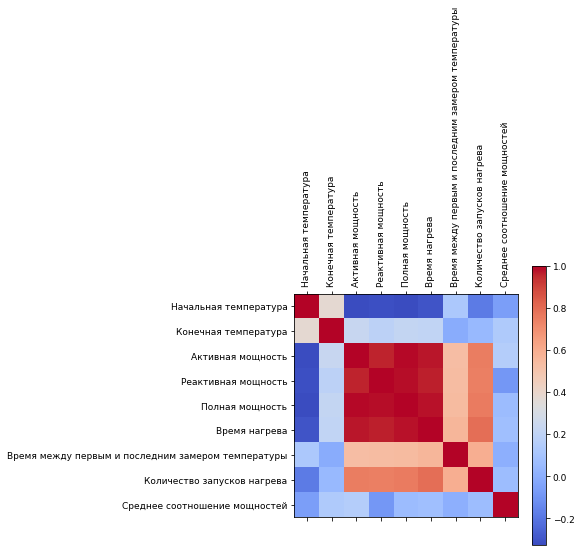

In [32]:
# Проверим модель на коллинеарность основных признаков

features_main = ['Начальная температура', 'Конечная температура', 'Активная мощность', \
                 'Реактивная мощность', 'Полная мощность', 'Время нагрева', \
                 'Время между первым и последним замером температуры', \
                 'Количество запусков нагрева', 'Среднее соотношение мощностей']

corr=data_all[features_main].corr()

cmap = plt.get_cmap('coolwarm')
f = plt.figure(figsize=(5, 5))

plt.matshow(corr, cmap=cmap, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=9, rotation=90)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=9)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)

In [33]:
# Удалим признаки с сильной корреляцией (больше 0.8)
# При этом сохраним признак полной мощности, т.к. он объединяет активную и реактивную

data_all.drop(columns=['Реактивная мощность', 'Активная мощность', 'Время нагрева'], inplace=True)

In [34]:
# Выделим признаки для обучения и целевой признак

X = data_all.drop(columns=['Конечная температура'], axis=1)
y = data_all['Конечная температура']

In [35]:
# Разделим датасет на обучающую и тестовую выборк
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_state)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1732, 30)
(743, 30)
(1732,)
(743,)


 <a href='#top'>Back to top</a>

<a id='section_4'></a>
### 4. Обучение моделей

Проведем обучение моделей методами линейной регрессии, LightGBM и CatBoost.
Обозначим допустимые уровни метрики качества, исходя из условий поставленной задачи:
* MAE > 8.7 — плохо
* 7.6 < MAE ≤ 8.7 — неудовлетворительно
* 6.8 < MAE ≤ 7.6 — удовлетворительно
* 6.3 < MAE ≤ 6.8 — хорошо
* 6.0 < MAE ≤ 6.3 — отлично
* MAE ≤ 6.0 — превосходно

#### Линейная регрессия

In [36]:
# Проведем кросс-валидацию с помощью kFold с делением на 5 частей
cv = KFold(n_splits=5, shuffle=False)

# Выберем параметры для подбора оптимальных с GridSearchCV
param_grid = [
    {
        'fit_intercept' : [True, False], \
        'normalize':[True, False]
    } 
]

grid = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
param_linear = grid.best_params_
print(param_linear)

{'fit_intercept': True, 'normalize': False}


В нашем случае лучшими параметрами оказались параметры по-умолчанию.

In [37]:
model_linear = LinearRegression(n_jobs=-1)
model_linear.fit(X_train, y_train)
pred_linear_train = model_linear.predict(X_train)
pred_linear = model_linear.predict(X_test)
print('Linear Regression МАЕ (train) =', mean_absolute_error(y_train, pred_linear_train))
print('Linear Regression МАЕ (test) =', mean_absolute_error(y_test, pred_linear))

Linear Regression МАЕ (train) = 7.321761902596685
Linear Regression МАЕ (test) = 7.195972542155173


#### LightGBM

In [38]:
# Выберем параметры для подбора оптимальных с GridSearchCV
param_grid = [
    {
        'boosting_type': ['gbdt', 'dart'],
        'objective': ['regression'],
        'learning_rate': [0.03, 0.07, 0.1],
        'num_iterations':[500],
        'random_state': [rnd_state], 
        'max_depth': np.arange(1, 5),
        'metric': ['mean_absolute_error']
    } 
]

grid = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
param_lgb = grid.best_params_
print(param_lgb)

{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 2, 'metric': 'mean_absolute_error', 'num_iterations': 500, 'objective': 'regression', 'random_state': 260686}


In [39]:
model_lgb = lgb.LGBMRegressor(boosting_type='gbdt', \
                              learning_rate=0.1, \
                              max_depth=2, \
                              metric='mean_absolute_error', \
                              num_iterations=500, \
                              objective='regression', \
                              random_state=260686)
model_lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mae')
pred_lgb_train = model_lgb.predict(X_train)
pred_lgb = model_lgb.predict(X_test)
print('LightGBM MAE (train) =', mean_absolute_error(y_train, pred_lgb_train))
print('LightGBM MAE (test) =', mean_absolute_error(y_test, pred_lgb))

[1]	valid_0's l1: 9.94304
[2]	valid_0's l1: 9.66974
[3]	valid_0's l1: 9.46537
[4]	valid_0's l1: 9.29685
[5]	valid_0's l1: 9.13491
[6]	valid_0's l1: 8.99834
[7]	valid_0's l1: 8.87311
[8]	valid_0's l1: 8.77273
[9]	valid_0's l1: 8.68398
[10]	valid_0's l1: 8.57034
[11]	valid_0's l1: 8.43637
[12]	valid_0's l1: 8.36447
[13]	valid_0's l1: 8.28797
[14]	valid_0's l1: 8.24213
[15]	valid_0's l1: 8.12061
[16]	valid_0's l1: 8.05294
[17]	valid_0's l1: 7.97486
[18]	valid_0's l1: 7.92463
[19]	valid_0's l1: 7.88879
[20]	valid_0's l1: 7.8116
[21]	valid_0's l1: 7.72648
[22]	valid_0's l1: 7.68717
[23]	valid_0's l1: 7.65586
[24]	valid_0's l1: 7.62294
[25]	valid_0's l1: 7.53893
[26]	valid_0's l1: 7.49887
[27]	valid_0's l1: 7.46935
[28]	valid_0's l1: 7.41883
[29]	valid_0's l1: 7.3921
[30]	valid_0's l1: 7.34786
[31]	valid_0's l1: 7.32759
[32]	valid_0's l1: 7.28219
[33]	valid_0's l1: 7.27201
[34]	valid_0's l1: 7.25446
[35]	valid_0's l1: 7.24559
[36]	valid_0's l1: 7.20382
[37]	valid_0's l1: 7.17182
[38]	valid_0

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>упс... "не взлетело")

<div style="background: #aeeaff; padding: 5px; border: 1px solid blue; border-radius: 5px;">
    <font color='blue'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>Проверил код еще раз, но такая ошибка не появляется: "Do not support non-ASCII characters in feature name"... Из предположений, воможно нужно обновить LightGBM.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
возможно, есть различия. ок.

#### CatBoost

In [40]:
# Выберем параметры для подбора оптимальных с GridSearchCV
param_grid = [
    {
        'loss_function': ['MAE'],
        'n_estimators': np.arange(400, 600, 100),
        'learning_rate': np.arange(0.03, 0.1, 0.02),
        'random_state': [rnd_state], 
        'max_depth': np.arange(2, 5)        
    } 
]

grid = GridSearchCV(estimator=CatBoostRegressor(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
param_cbr = grid.best_params_
print(param_cbr)

0:	learn: 10.3465911	total: 143ms	remaining: 57.1s
1:	learn: 10.3202803	total: 144ms	remaining: 28.6s
2:	learn: 10.2960586	total: 145ms	remaining: 19.1s
3:	learn: 10.2456460	total: 145ms	remaining: 14.4s
4:	learn: 10.2297091	total: 146ms	remaining: 11.5s
5:	learn: 10.1993527	total: 147ms	remaining: 9.63s
6:	learn: 10.1788535	total: 147ms	remaining: 8.27s
7:	learn: 10.1568059	total: 148ms	remaining: 7.25s
8:	learn: 10.1191184	total: 149ms	remaining: 6.46s
9:	learn: 10.0684886	total: 149ms	remaining: 5.82s
10:	learn: 10.0528117	total: 150ms	remaining: 5.3s
11:	learn: 10.0229927	total: 151ms	remaining: 4.87s
12:	learn: 9.9970851	total: 151ms	remaining: 4.51s
13:	learn: 9.9767640	total: 152ms	remaining: 4.19s
14:	learn: 9.9392934	total: 153ms	remaining: 3.92s
15:	learn: 9.9110838	total: 154ms	remaining: 3.69s
16:	learn: 9.8903827	total: 154ms	remaining: 3.48s
17:	learn: 9.8747713	total: 155ms	remaining: 3.29s
18:	learn: 9.8306181	total: 156ms	remaining: 3.12s
19:	learn: 9.8083741	total: 15

In [41]:
model_cbr = CatBoostRegressor(loss_function='MAE', \
                              n_estimators=500, \
                              learning_rate=0.09, \
                              random_state=260686, \
                              max_depth=4)

model_cbr.fit(X_train, y_train)
pred_cbr_train = model_cbr.predict(X_train)
pred_cbr = model_cbr.predict(X_test)
print('CatBoost МАE (train) =', mean_absolute_error(y_train, pred_cbr_train))
print('CatBoost МАE (test) =', mean_absolute_error(y_test, pred_cbr))

0:	learn: 9.8002242	total: 31.7ms	remaining: 15.8s
1:	learn: 9.6284920	total: 33.1ms	remaining: 8.23s
2:	learn: 9.4222734	total: 34.4ms	remaining: 5.7s
3:	learn: 9.1976024	total: 35.8ms	remaining: 4.43s
4:	learn: 8.9767117	total: 37.1ms	remaining: 3.68s
5:	learn: 8.8458002	total: 38.4ms	remaining: 3.16s
6:	learn: 8.7585302	total: 39.6ms	remaining: 2.79s
7:	learn: 8.6164206	total: 40.8ms	remaining: 2.51s
8:	learn: 8.4744978	total: 42ms	remaining: 2.29s
9:	learn: 8.3420314	total: 43.1ms	remaining: 2.11s
10:	learn: 8.2414833	total: 44.4ms	remaining: 1.98s
11:	learn: 8.0816938	total: 45.8ms	remaining: 1.86s
12:	learn: 7.9968728	total: 47.1ms	remaining: 1.76s
13:	learn: 7.9180757	total: 48.5ms	remaining: 1.68s
14:	learn: 7.8529251	total: 49.8ms	remaining: 1.61s
15:	learn: 7.8044007	total: 51.5ms	remaining: 1.56s
16:	learn: 7.7468272	total: 52.7ms	remaining: 1.5s
17:	learn: 7.6283759	total: 54ms	remaining: 1.45s
18:	learn: 7.5632576	total: 55.9ms	remaining: 1.41s
19:	learn: 7.4868015	total: 

Соберем все полученные результаты в сводную таблицу и построим график

In [42]:
summary = pd.DataFrame(
    data={'CatBoost': [mean_absolute_error(y_train, pred_cbr_train), mean_absolute_error(y_test, pred_cbr), param_cbr],
          'LightGBM': [mean_absolute_error(y_train, pred_lgb_train), mean_absolute_error(y_test, pred_lgb), param_lgb],
         'LinearRegression': [mean_absolute_error(y_train, pred_linear_train), mean_absolute_error(y_test, pred_linear), param_linear]
         },
    index=['mae_train', 'mae_test', 'model_params']
)

summary.T

,mae_train,mae_test,model_params
CatBoost,3.78213,5.70495,"{'learning_rate': 0.09000000000000001, 'loss_f..."
LightGBM,4.33045,6.0284,"{'boosting_type': 'gbdt', 'learning_rate': 0.1..."
LinearRegression,7.32176,7.19597,"{'fit_intercept': True, 'normalize': False}"


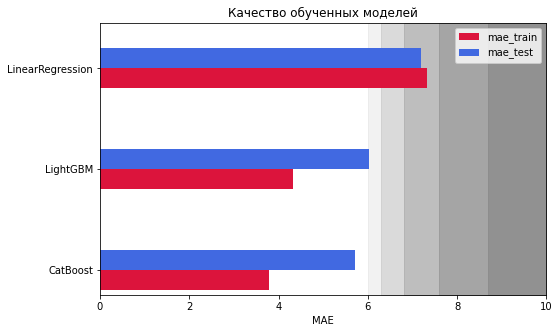

In [43]:
# Построим график, выделим уровни оценки полученных значений 

ax0, ax1 = plt.subplots(figsize=(8, 4))

x1 = np.arange(8.7, 13.7, 2)
x2 = np.arange(7.6, 12.6, 2)
x3 = np.arange(6.8, 11.8, 2)
x4 = np.arange(6.3, 11.3, 2)
x5 = np.arange(6, 11, 2)

ax1.fill_between(x1, 1, color='gray', alpha=0.5, transform=ax1.get_xaxis_transform())
ax1.fill_between(x2, 1, color='gray', alpha=0.4, transform=ax1.get_xaxis_transform())
ax1.fill_between(x3, 1, color='gray', alpha=0.3, transform=ax1.get_xaxis_transform())
ax1.fill_between(x4, 1, color='gray', alpha=0.2, transform=ax1.get_xaxis_transform())
ax1.fill_between(x5, 1, color='gray', alpha=0.1, transform=ax1.get_xaxis_transform())

ax0 = plt.gca()
summary.T['mae_train'].plot(kind='barh', figsize=(8,5), ax=ax0, position=1, color='crimson', width=0.2)
summary.T['mae_test'].plot(kind='barh', figsize=(8,5), ax=ax0, position=0, color='royalblue', width=0.2)
ax0.legend(['mae_train', 'mae_test'])
ax0.set(xlim=[0, 10], xlabel='MAE')

plt.title('Качество обученных моделей')
plt.legend(loc='upper right')
       
plt.show()

По шкале оценки полученных значений метрики качества превосходное качество по метрике МАЕ показала модель **CatBoost (МАЕ=5.7)**, отлично отработала модель **LightGBM (МАЕ=6.0)** , а модель **линейной регрессии (МАЕ=7.2)** показала удовлетворительные результаты.

Text(0.5, 1.0, 'CatBoost Model Feature Importances')

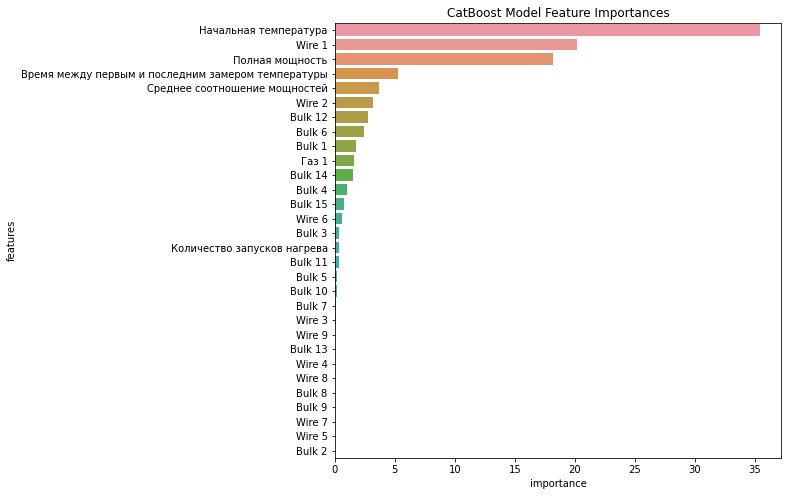

In [44]:
# Выведем график важности факторов для лучшей модели

features = X_train.columns
importance = model_cbr.feature_importances_

feature_importances = pd.DataFrame({'features': features, 'importance': importance})
feature_importances = feature_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 8))
sns.barplot(feature_importances['importance'], feature_importances['features'])

plt.title('CatBoost Model Feature Importances')

Как видно из графика, основная важность при моделировании у величин начальной температуры, объема проволочного материала №1 и полной мощности. Количество запусков нагрева при этом практически не оказывает влияния на работу модели.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
Алексей, скажу, что уверенная работа, на мой взгляд)<br>
Обработка данных, модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Осталось лишь несколько вопросов с моей стороны))<br>
<font color='red'>    
1) При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы модели имеют сильную корреляцию друг с другом - больше 0.8).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее)<br><br>
    
2) Попробуй с помощью команды feature_importances_ выводить график важности факторов. Отличная вещь будет: высока яметрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала.
Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют.<br>
    
<font color='green'>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Просто эти два пункта - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>
    
Ну и моделька одна не захотела "взлетать"( <br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

<div style="background: #aeeaff; padding: 5px; border: 1px solid blue; border-radius: 5px;">
    <font color='blue'> <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
</font>
<font color='blue'><br>Спасибо за ценные комментарии. Отчет скорректировал.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
ОК, Алексей, с доработкой всё в точку) <br>
Хорошо тебе удалось ещё поработать.<br>
 
Технически - добротная работа. <br>
Здесь, наверное, стоит вот ещё что заметить: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
<font color='green'>

Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)

 <a href='#top'>Back to top</a>

<a id='section_lib'></a>
### Список использованной литературы
1. Ткачев, А. С. Исследование и оценка эффективности применения трубчатых электродов с целью снижения энергетических затрат при выплавке стали в дуговых сталеплавильных печах малой и средней вместимости : дис. ... канд. техн. наук : 05.16.02 / Ткачев Александр Сергеевич. - М., 2016. – 17-18 с.

<a href='#top'>Back to top</a>

<a id='section_i'></a>
### План работы:
    
- Импорт и изучение данных
- Предобработка данных
    - Очистка данных
    - Сведение данных по признаку `key`
- Подготовка данных:
    - Разбор признаков
    - Выделение целевого признака
- Анализ данных, построение моделей линейной регрессии, LightGBM и CatBoost
- Проверка работоспособности выбранной модели на тестовой выборке
- Подготовка итоговой сводной таблицы метрик качества моделей
- Формирование итогового отчета

<a href='#top'>Back to top</a>